# machine_learning.ipynb



In [10]:

# 1. Importación de librerías

import os
import pandas as pd
import numpy as np


# Ignorar warnings (opcional)
import warnings
warnings.filterwarnings("ignore")



## 2. Carga de datos

En este apartado, definimos las rutas de los archivos `.xlsx` que contienen los distintos **X_train** y **X_test** (con outliers, sin outliers, normalizados, escalados, etc.), así como los vectores `y_train` y `y_test`. 


In [11]:

# 2. Carga de datos

# Ruta base a la carpeta processed
BASE_PATH = "/workspaces/regularized_mod_regresion_lineal/data/processed"

# Archivos disponibles según tu carpeta
TRAIN_PATHS = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx",
    "X_train_con_outliers_norm.xlsx",
    "X_train_sin_outliers_norm.xlsx",
    "X_train_con_outliers_scal.xlsx",
    "X_train_sin_outliers_scal.xlsx"
]

TEST_PATHS = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx",
    "X_test_con_outliers_norm.xlsx",
    "X_test_sin_outliers_norm.xlsx",
    "X_test_con_outliers_scal.xlsx",
    "X_test_sin_outliers_scal.xlsx"
]

# Carga de datasets
TRAIN_DATASETS = [pd.read_excel(os.path.join(BASE_PATH, path)) for path in TRAIN_PATHS]
TEST_DATASETS = [pd.read_excel(os.path.join(BASE_PATH, path)) for path in TEST_PATHS]

# Carga de las variables objetivo
y_train = pd.read_excel(os.path.join(BASE_PATH, "y_train.xlsx")).iloc[:, 0]
y_test = pd.read_excel(os.path.join(BASE_PATH, "y_test.xlsx")).iloc[:, 0]

# Verificación
print("Cantidad de datasets de TRAIN cargados:", len(TRAIN_DATASETS))
print("Cantidad de datasets de TEST cargados:", len(TEST_DATASETS))


Cantidad de datasets de TRAIN cargados: 6
Cantidad de datasets de TEST cargados: 6


In [12]:
# Cargar los datos procesados
train_data = pd.read_csv("/workspaces/regularized_mod_regresion_lineal/data/processed/clean_train_data.csv")
test_data = pd.read_csv("/workspaces/regularized_mod_regresion_lineal/data/processed/clean_test_data.csv")
 
# Mostrar las primeras filas de los datos de entrenamiento
print("Datos de entrenamiento:")
print(train_data.head())

Datos de entrenamiento:
    TOT_POP  POP_ESTIMATE_2018  Obesity_number  Heart disease_number  \
0   26625.0            26625.0          7930.0                2072.0   
1   51266.0            51266.0         13713.0                3796.0   
2   37779.0            37779.0         10238.0                2222.0   
3   91984.0            91984.0         25735.0                5484.0   
4  134487.0           134487.0         38882.0                8686.0   

   CKD_number  anycondition_number  
0       771.0                10213  
1      1454.0                19282  
2       871.0                14283  
3      2118.0                33057  
4      3490.0                49754  


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TOT_POP               2512 non-null   float64
 1   POP_ESTIMATE_2018     2512 non-null   float64
 2   Obesity_number        2512 non-null   float64
 3   Heart disease_number  2512 non-null   float64
 4   CKD_number            2512 non-null   float64
 5   charges               2512 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 117.9 KB


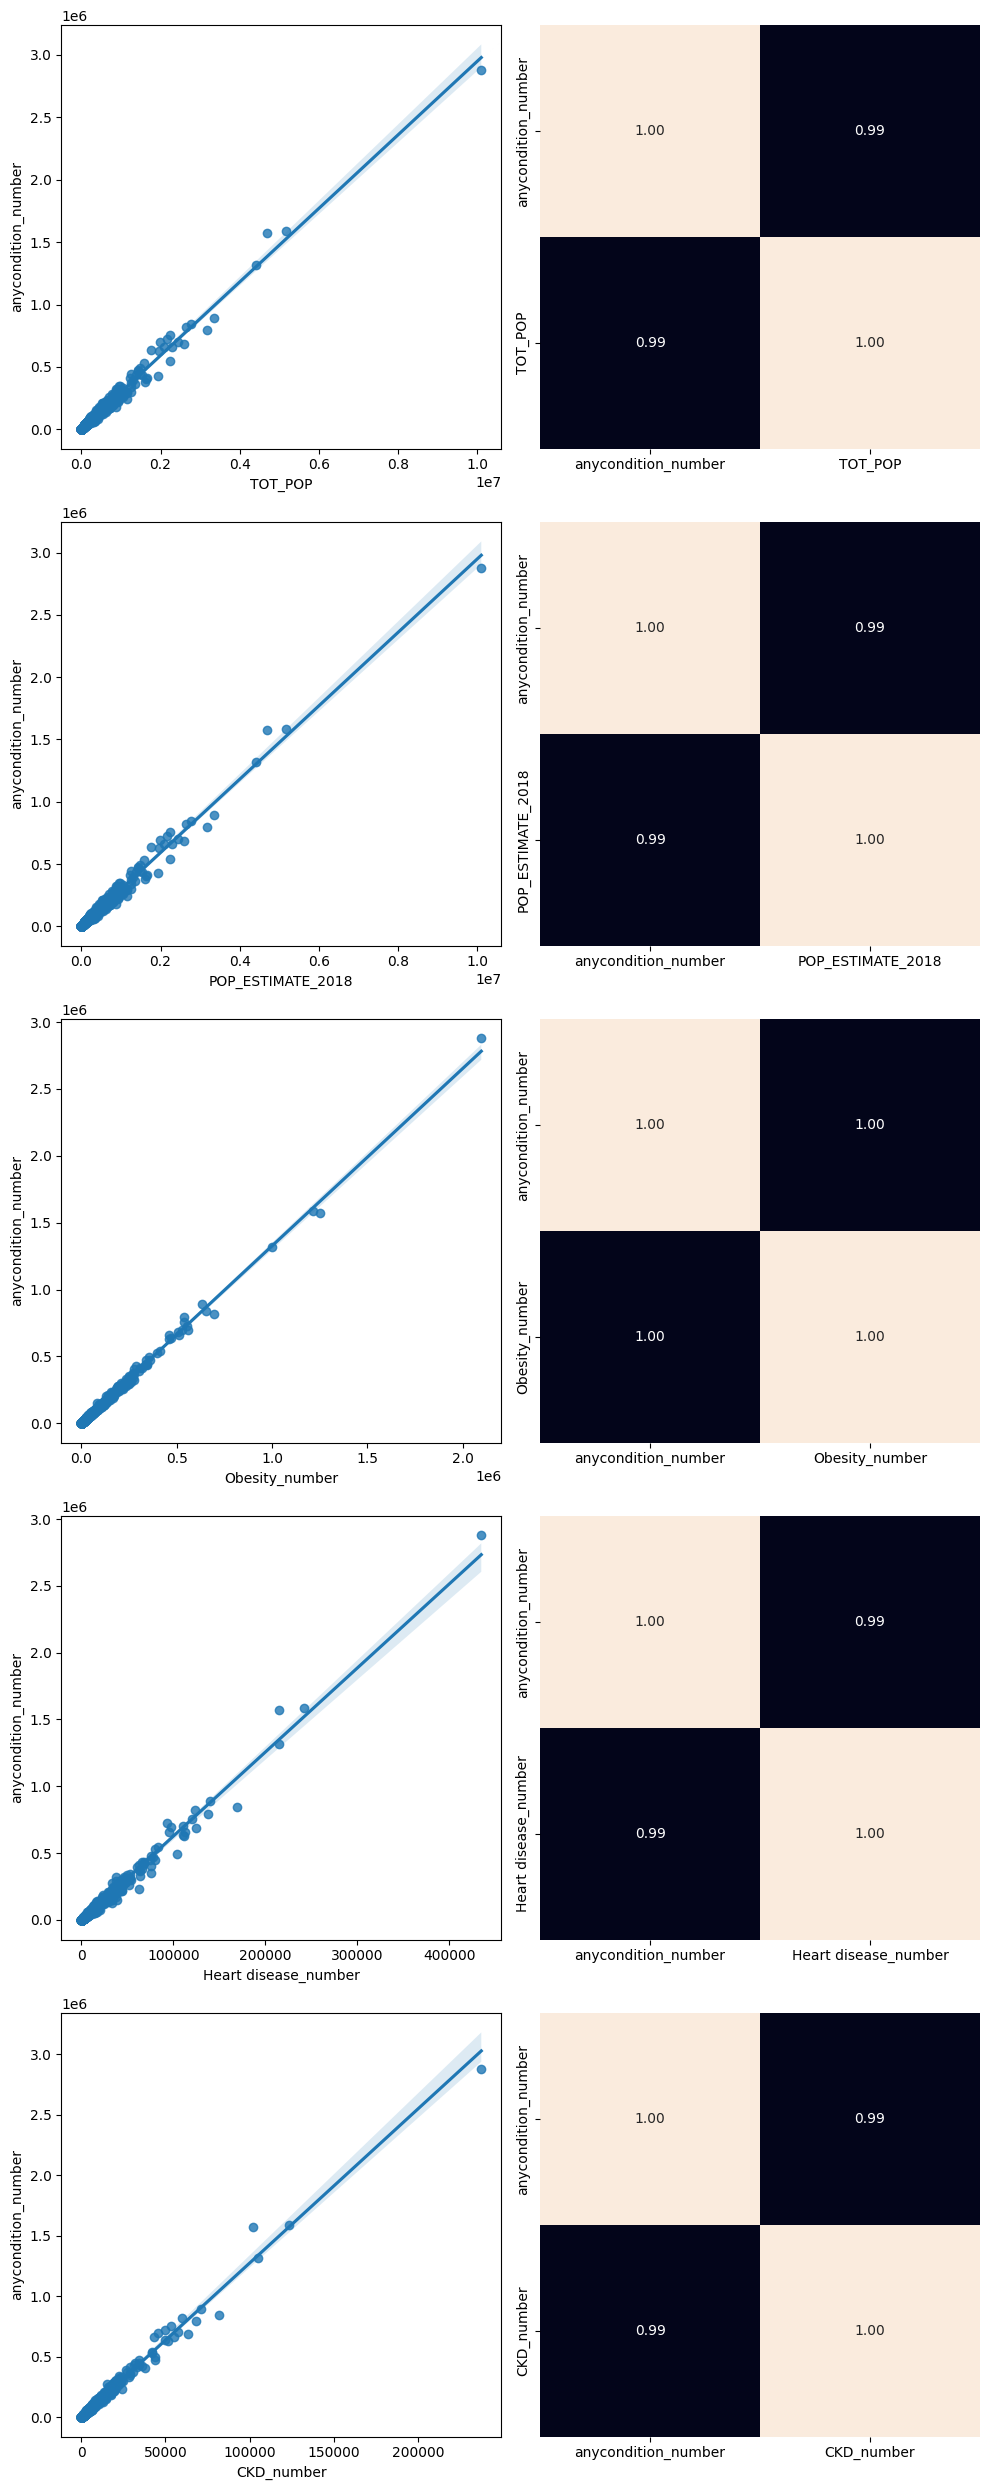

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Concatenar datos de entrenamiento y prueba para análisis
total_data = pd.concat([train_data, test_data], ignore_index=True)
 
# Crear gráficos de regresión y matrices de correlación
variables = ["TOT_POP", "POP_ESTIMATE_2018", "Obesity_number", "Heart disease_number", "CKD_number"]  # Lista de variables a analizar
fig, axis = plt.subplots(len(variables), 2, figsize=(10, 5 * len(variables)))
 
for i, var in enumerate(variables):
   # Regresión entre la variable y 'anycondition_number'
   sns.regplot(data=total_data, x=var, y="anycondition_number", ax=axis[i, 0])
   # Matriz de correlación entre la variable y 'anycondition_number'
   sns.heatmap(total_data[["anycondition_number", var]].corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=False)
 
# Ajustar la visualización
plt.tight_layout()
plt.show()


In [17]:
# Separar las características (X) y la variable objetivo (y) en los datos de entrenamiento y prueba
X_train = train_data.drop(["anycondition_number"], axis=1)  # Eliminar 'anycondition_number' del conjunto de características
y_train = train_data["anycondition_number"]  # Variable objetivo para entrenamiento
X_test = test_data.drop(["anycondition_number"], axis=1)  # Hacer lo mismo para el conjunto de prueba
y_test = test_data["anycondition_number"]  # Variable objetivo para prueba

In [18]:
from sklearn.linear_model import LinearRegression
 
# Crear el modelo de regresión lineal
model = LinearRegression()
 
# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
 
# Mostrar el intercepto y los coeficientes del modelo de regresión lineal
print(f"Intercept (a): {model.intercept_}")  # Intercepto
print(f"Coefficients: {model.coef_}")  # Coeficientes

Intercept (a): 74.52547063570819
Coefficients: [0.0163649  0.0163649  0.86272892 0.70976346 1.66273433]


In [21]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
 
# Mostrar las predicciones
print("Predicted Charges:")
print(y_pred)

Predicted Charges:
[3.74182983e+03 8.37404144e+04 8.00020612e+03 3.65691478e+04
 6.32513553e+04 8.40164122e+03 4.14735224e+03 6.12331545e+03
 1.84696949e+03 4.76782723e+03 7.42243886e+03 9.52313670e+02
 3.26443292e+04 6.78942444e+03 5.50101226e+04 1.41132957e+04
 3.21144803e+05 6.72500880e+03 1.08046446e+04 2.01529668e+03
 8.31241590e+03 3.69317951e+03 4.45386917e+03 3.03053938e+03
 6.90817434e+05 1.72820566e+04 4.59438436e+03 1.19048965e+04
 4.78276293e+03 1.23791326e+03 5.68146545e+03 1.18677624e+04
 1.27401827e+04 1.55900072e+04 4.75850286e+04 7.67598233e+03
 1.43402586e+04 6.82409151e+03 5.08396085e+03 1.26160963e+04
 7.66341235e+03 6.66096409e+04 1.93553904e+03 7.35093047e+02
 1.71262446e+04 3.44169316e+03 1.85740504e+03 3.56202172e+04
 4.88060322e+03 3.25523301e+03 7.62503086e+04 1.46699432e+03
 8.61048790e+03 2.85038818e+03 5.76975343e+04 4.68850300e+03
 1.96931013e+05 1.07594429e+04 1.82127318e+04 4.36630678e+03
 4.87875555e+04 1.03077378e+03 2.66279487e+03 5.65989440e+04
 8.72

In [22]:
# Calcular y mostrar el error cuadrático medio (MSE) y el R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

MSE: 6093056.379394744
R² Score: 0.9983325112168355


In [23]:
from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)

# Entrenamos el modelo
lasso_model.fit(X_train, y_train)

# Evaluamos el rendimiento del modelo con los datos de prueba
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [3.31978952e-02 6.58458000e-15 8.61514812e-01 7.26689458e-01
 1.62028629e+00]
R2 score: 0.9983358215487631


In [24]:
import pickle

with open("/workspaces/regularized_mod_regresion_lineal/models/lasso_alpha-1.0.sav", "wb") as f:
    pickle.dump(lasso_model, f)
